In [2]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk import bigrams

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jjasi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Loading a dataset
reviews = pd.read_csv('./data/tripadvisor_hotel_reviews.csv')

In [5]:
# Preprocessing function
def preprocess(text):
    # Cleaning whitespaces
    text_white = re.sub(r'\s+', ' ', text, flags=re.UNICODE)

    # Removing numbers
    text_number = re.sub(r'\d+', '', text_white)

    # Lowering text
    text_lower = text_number.lower()

    # Removing punctuation
    text_punctuation = text_lower.translate(str.maketrans('', '', string.punctuation))

    return text_punctuation

In [6]:
# Lemmatizing function
lemmatizer = WordNetLemmatizer()
tokenizer = TweetTokenizer()

def lemmatize(text):
    text_word = [lemmatizer.lemmatize(word) for word in tokenizer.tokenize(text)]

    return text_word

In [7]:
# Stopwords removal function
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    text_stopwords = [word for word in text if word not in stop_words]

    return text_stopwords

In [10]:
# Bigrams function
def get_bigrams(text):
    text_bigrams = [bigram for bigram in bigrams(text)]

    return text_bigrams

In [11]:
# Applying processing function
reviews['Review_processed'] = reviews.Review.apply(lambda row : preprocess(row))

In [12]:
# Applying lemmatizing function
reviews['Review_lemmatized'] = reviews.Review_processed.apply(lambda row : lemmatize(row))

In [13]:
# Applying stopwords removal function
reviews['Review_stopwords'] = reviews.Review_lemmatized.apply(lambda row : remove_stopwords(row))

In [14]:
all_stop_words = []

for _, row in reviews.iterrows():
    l = [e for e in row.Review_lemmatized if e not in row.Review_stopwords]
    all_stop_words.extend(l)

stop_words_df = pd.DataFrame.from_dict(Counter(all_stop_words), orient='index', columns=['occurrence_number'])

<AxesSubplot: title={'center': 'Not removed stopwords with the highest occurrence number'}>

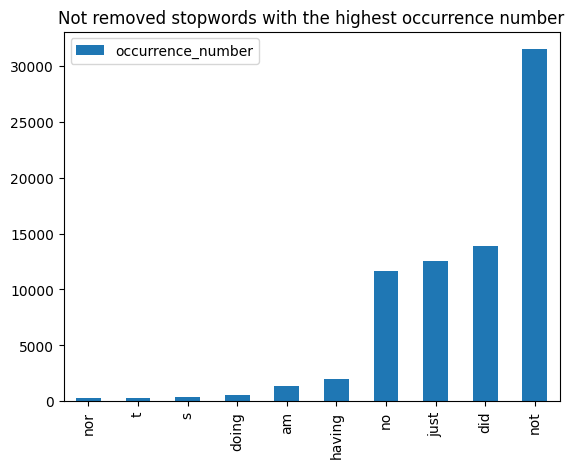

In [22]:
stop_words_df.sort_values(by='occurrence_number')[-10:].plot(kind="bar", title="Not removed stopwords with the highest occurrence number")

In [12]:
# Applying bigrams function
reviews['Review_bigrams'] = reviews.Review_stopwords.apply(lambda row : get_bigrams(row))

In [13]:
# Displaying processed data
reviews[['Review', 'Review_processed', 'Review_lemmatized', 'Review_stopwords', 'Review_bigrams']]

,Review,Review_processed,Review_lemmatized,Review_stopwords,Review_bigrams
0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[(nice, hotel), (hotel, expensive), (expensive..."
1,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[(ok, nothing), (nothing, special), (special, ..."
2,nice rooms not 4* experience hotel monaco seat...,nice rooms not experience hotel monaco seattl...,"[nice, room, not, experience, hotel, monaco, s...","[nice, room, experience, hotel, monaco, seattl...","[(nice, room), (room, experience), (experience..."
3,"unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[(unique, great), (great, stay), (stay, wonder..."
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[(great, stay), (stay, great), (great, stay), ..."
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",best kept secret rd time staying charm not sta...,"[best, kept, secret, rd, time, staying, charm,...","[best, kept, secret, rd, time, staying, charm,...","[(best, kept), (kept, secret), (secret, rd), (..."
20487,great location price view hotel great quick pl...,great location price view hotel great quick pl...,"[great, location, price, view, hotel, great, q...","[great, location, price, view, hotel, great, q...","[(great, location), (location, price), (price,..."
20488,"ok just looks nice modern outside, desk staff ...",ok just looks nice modern outside desk staff n...,"[ok, just, look, nice, modern, outside, desk, ...","[ok, look, nice, modern, outside, desk, staff,...","[(ok, look), (look, nice), (nice, modern), (mo..."
20489,hotel theft ruined vacation hotel opened sept ...,hotel theft ruined vacation hotel opened sept ...,"[hotel, theft, ruined, vacation, hotel, opened...","[hotel, theft, ruined, vacation, hotel, opened...","[(hotel, theft), (theft, ruined), (ruined, vac..."


In [14]:
# getting reviews' length
reviews['Words_number'] = reviews.Review_lemmatized.apply(lambda x: len(x))

In [15]:
# getting reviews' commas number
reviews['Commas'] = reviews.Review.apply(lambda review_text: review_text.count(','))

In [16]:
# computing average length of a sentence
# there are no '.' so I use ','
# not sure if it should be used since there are no stopwords
# it also has a bug :D, it counts spaces and there is always an extra one 
reviews['Average_length'] = reviews.Review.apply(lambda review_text: np.mean([len(sentence.split(' ')) for sentence in review_text.split(',')]))

In [17]:
# Saving processed data
reviews.to_csv('./data/reviews_clean.csv', index=False)